##Team Performance Analysis:
Sports teams and franchises can use this data to assess the overall performance of their teams. They can see how well their batting lineup is performing in terms of runs scored and how efficiently they are utilizing their strikes. This analysis can help teams make strategic decisions, such as adjusting batting orders or player rotations.

In [ ]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import torch
from sklearn.cluster import SpectralClustering


In [ ]:
#read and display data from file
runs = pd.read_csv('Ball_by_Ball.csv')
runs.head(10)

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
0,335987,1,1,1,1,2,1,1,2,14,0,legbyes,1,,,
1,335987,1,1,2,1,2,2,2,1,14,0,,,,,
2,335987,1,1,3,1,2,2,2,1,14,0,wides,1,,,
3,335987,1,1,4,1,2,2,2,1,14,0,,,,,
4,335987,1,1,5,1,2,2,2,1,14,0,,,,,
5,335987,1,1,6,1,2,2,2,1,14,0,,,,,
6,335987,1,1,7,1,2,2,2,1,14,0,legbyes,1,,,
7,335987,1,2,1,1,2,2,2,1,15,0,,,,,
8,335987,1,2,2,1,2,2,2,1,15,4,,,,,
9,335987,1,2,3,1,2,2,2,1,15,4,,,,,


#Data Wrangling

In [ ]:
#replace empty or whitespace-only values to nan in dataframe runs for column Dissimal_Type
runs['Dissimal_Type'] = runs['Dissimal_Type'].replace(r'^\s*$', np.nan, regex=True)
runs.head(10)

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
0,335987,1,1,1,1,2,1,1,2,14,0,legbyes,1,,NaN,
1,335987,1,1,2,1,2,2,2,1,14,0,,,,NaN,
2,335987,1,1,3,1,2,2,2,1,14,0,wides,1,,NaN,
3,335987,1,1,4,1,2,2,2,1,14,0,,,,NaN,
4,335987,1,1,5,1,2,2,2,1,14,0,,,,NaN,
5,335987,1,1,6,1,2,2,2,1,14,0,,,,NaN,
6,335987,1,1,7,1,2,2,2,1,14,0,legbyes,1,,NaN,
7,335987,1,2,1,1,2,2,2,1,15,0,,,,NaN,
8,335987,1,2,2,1,2,2,2,1,15,4,,,,NaN,
9,335987,1,2,3,1,2,2,2,1,15,4,,,,NaN,


In [ ]:
#Display datatypes
runs.dtypes

Match_Id                     int64
Innings_Id                   int64
Over_Id                      int64
Ball_Id                      int64
Team_Batting_Id              int64
Team_Bowling_Id              int64
Striker_Id                   int64
Striker_Batting_Position     int64
Non_Striker_Id               int64
Bowler_Id                    int64
Batsman_Scored              object
Extra_Type                  object
Extra_Runs                  object
Player_dissimal_Id          object
Dissimal_Type               object
Fielder_Id                  object
dtype: object

In [ ]:
#clean and preprocess two columns in the DataFrame
runs["Extra_Runs"] = pd.to_numeric(runs["Extra_Runs"], errors="coerce")
runs["Extra_Runs"] = runs["Extra_Runs"].fillna(0)

runs["Batsman_Scored"] = pd.to_numeric(runs["Batsman_Scored"], errors="coerce")
runs["Batsman_Scored"] = runs["Batsman_Scored"].fillna(0)

In [ ]:
##This calculates the runs, balls faced, and strike rate for each unique player (batsman) based on the data in the runs DataFrame

#empty lists that will be used to store the runs and balls faced by each batsman.
batsmen_runs = []
batsmen_ballsFaced = []

for i in runs["Striker_Id"].unique():
    r = runs["Batsman_Scored"][runs["Striker_Id"] == i].sum()
    b = runs["Match_Id"][runs["Striker_Id"] == i].count()
    batsmen_runs.append(r)
    batsmen_ballsFaced.append(b)

#iterates over unique values of "Striker_Id" in the runs dataframe
batsmen = pd.DataFrame({"Player_Id": runs["Striker_Id"].unique()})

#For each unique batsman ID (i), the code calculates their total runs (r) and total balls faced (b) by filtering the runs DataFrame using the batsman's ID and then applying the .sum() and .count() functions, respectively.
batsmen["Runs"] = batsmen_runs
batsmen["Balls_played"] = batsmen_ballsFaced

batsmen["Strike_Rate"] = (batsmen["Runs"] * 100 / batsmen["Balls_played"]).round(2)

In [ ]:
# the batsmen DataFrame  contains information about each batsman's runs, balls faced, and strike rate based on the data in the runs DataFrame.
batsmen.head(5)

,Player_Id,Runs,Balls_played,Strike_Rate
0,1,1349.0,1326,101.73
1,2,2435.0,1954,124.62
2,3,91.0,129,70.54
3,4,1322.0,1101,120.07
4,5,64.0,84,76.19


#K-Means Clustering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

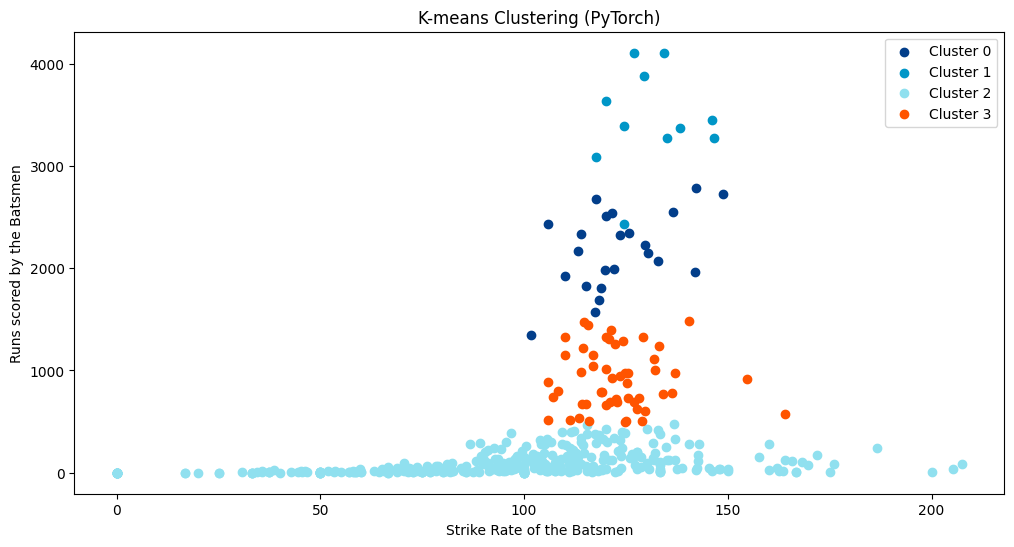

In [ ]:
data = np.array(batsmen[["Strike_Rate", "Runs"]])

# Convert data to PyTorch tensors
data_tensor = torch.tensor(data, dtype=torch.float32)

# Number of clusters
k = 4

# Initialize cluster centers randomly using the first k data points
centers = data_tensor[:k]

# Number of iterations for convergence
max_iterations = 100

for _ in range(max_iterations):
    # Calculate distances between data points and cluster centers
    distances = torch.cdist(data_tensor, centers)

    # Assign each data point to the nearest cluster center
    cluster_assignments = torch.argmin(distances, dim=1)

    # Update cluster centers as the mean of points assigned to each cluster
    for i in range(k):
        cluster_points = data_tensor[cluster_assignments == i]
        if len(cluster_points) > 0:
            centers[i] = torch.mean(cluster_points, dim=0)

# Add the cluster labels to your DataFrame
batsmen["cluster"] = cluster_assignments.numpy()

# Plot the clusters
plt.figure(figsize=(12, 6))

# Custom colors for plotting
colors = ["#023e8a", "#0096c7", "#90e0ef", "#ff5400", "#ffbd00"]

# Plot each cluster with a unique color
for cluster_label in np.unique(cluster_assignments):
    plt.scatter(data[cluster_assignments == cluster_label, 0],
                data[cluster_assignments == cluster_label, 1],
                color=colors[cluster_label % len(colors)],
                label=f"Cluster {cluster_label}")

plt.title("K-means Clustering (PyTorch)")
plt.xlabel("Strike Rate of the Batsmen")
plt.ylabel("Runs scored by the Batsmen")
plt.legend()
plt.show()



#Spectral Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


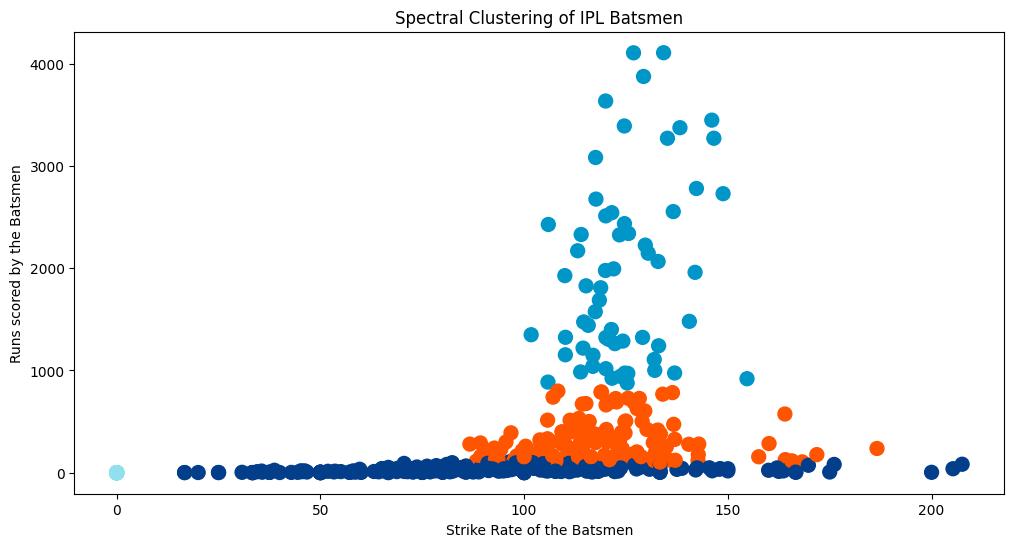

In [ ]:
data = batsmen[["Strike_Rate", "Runs"]]

# Create a SpectralClustering instance
n_clusters = 4  # Define the number of clusters
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')

# Fit the SpectralClustering model to the data
cluster_labels = spectral_clustering.fit_predict(data)

# Add cluster labels to the DataFrame
batsmen["cluster"] = cluster_labels

# Define custom colors for plotting
custom_colors = ["#023e8a", "#0096c7", "#90e0ef", "#ff5400", "#ffbd00"]
colors = [custom_colors[label] for label in cluster_labels]

# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(data["Strike_Rate"], data["Runs"], c=colors, s=100)
plt.title("Spectral Clustering of IPL Batsmen")
plt.xlabel("Strike Rate of the Batsmen")
plt.ylabel("Runs scored by the Batsmen")
plt.show()